# Ejercicio 1 - Práctica

## Imports

In [38]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
import pandas as pd
import matplotlib.pyplot as plt

## Cargar datos

In [39]:
# Cargar el conjunto de datos (usaremos el conjunto de datos Iris como ejemplo)
data = pd.read_csv('cancer_data.csv')
data = data.drop('Patient Id', axis=1)

In [40]:
categoria_numerica = {'Low': 0, 'Medium': 1, 'High': 2}
data['Level'] = data['Level'].map(categoria_numerica)

In [41]:
data.columns

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [42]:
# Dividir el conjunto de datos en entrenamiento y prueba
X = data.drop('Level', axis=1)
y = data['Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Distribución de los datos

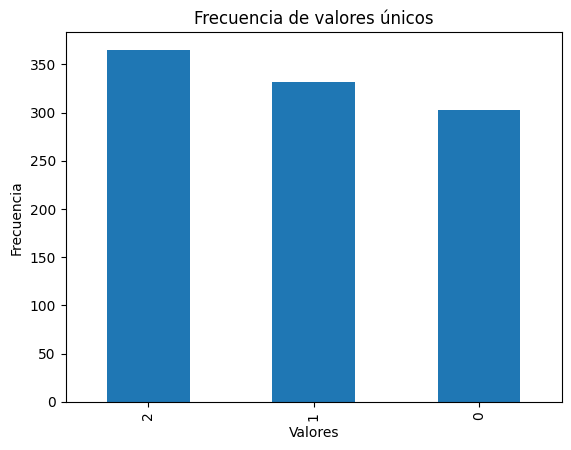

In [43]:
valores_frecuencias = data['Level'].value_counts()

# Graficar los valores y sus frecuencias
valores_frecuencias.plot(kind='bar')

# Configurar las etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de valores únicos')

# Mostrar la gráfica
plt.show()

## Crear modelos base

In [44]:

logistic_model = LogisticRegression()
random_forest_model = RandomForestClassifier()
svm_model = SVC()

logistic_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)


c:\Users\DELL\Documents\U\Semestre 8\Simulación\Lab7_ModSim\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

## Predicciones modelos base

In [45]:
# Hacer predicciones con los modelos individuales
logistic_predictions = logistic_model.predict(X_test)
rf_predictions = random_forest_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)

# Calcular la precisión de los modelos individuales
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)


## Creación meta-modelo

In [46]:

# Crear un meta-modelo (usaremos un clasificador de votación)
voting_clf = VotingClassifier(estimators=[
    ('logistic', logistic_model),
    ('random_forest', random_forest_model),
    ('svm', svm_model)
], voting='hard')

# Entrenar el meta-modelo con las predicciones de los modelos individuales
voting_clf.fit(X_train, y_train)

# Hacer predicciones con el meta-modelo
meta_model_predictions = voting_clf.predict(X_test)

# Calcular la precisión del meta-modelo
meta_model_accuracy = accuracy_score(y_test, meta_model_predictions)

print(f'Precisión del modelo de Regresión Logística: {logistic_accuracy}')
print(f'Precisión del modelo de Bosque Aleatorio: {rf_accuracy}')
print(f'Precisión del modelo SVM: {svm_accuracy}')
print(f'Precisión del meta-modelo (clasificador de votación): {meta_model_accuracy}')


c:\Users\DELL\Documents\U\Semestre 8\Simulación\Lab7_ModSim\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precisión del modelo de Regresión Logística: 0.995
Precisión del modelo de Bosque Aleatorio: 1.0
Precisión del modelo SVM: 0.965
Precisión del meta-modelo (clasificador de votación): 1.0


## Preguntas

**a. ¿Por qué este es un ejemplo de meta-modelado?**  
El meta-modelado busca que mediante a ciertas caracteristicas de un fenomeno se pueda predecir el comportamiento de este sin la necesidad de modelar o sabar todas las complejas relaciones que existen entre estos datos. En este caso se busca predecir el avance o "nivel" en la que se encuentra el cancer. Para encontrar esta relación en los datos se están utilizando 3 modelos base, los cuales se combinan para que el meta-modelo pueda predecir el nivel de cancer.

**b. ¿Cuál es el modelo sustitutivo?**  
Para el modelo sustituto se escogio un modelo de clasificador por votación, este modelo obtiene las predicciones de los modelos base y mediante la votación de estos predice el nivel de cancer. Debido a que estamos utilizando un modelo de votación utilizamos 3 modelos para evitar los empates

**c. Explique adecuadamente la construcción de su modelo y qué aplicaciones puede tener en la vida real**  

El modelo fue construido usando 3 modelos base, que fueron una regresión logística, un random forest y una SVM. Estos modelos luego fueron usados con un clasificador por medio de votos, el cual se encarga de predecir el nivel del cáncer dependiendo del resultado de cada modelo. Entonces, se usa el resultado más frecuente obtenido. Este clasificador por votos es el meta-modelo, que básicamente se puede decir que administra los resultados obtenidos de cada submodelo para poder capturar las relaciones del fenómeno y producir resultados. En la vida real puede tener múltiples aplicaciones. Como se evidenció con el conjunto de datos usado, puede ayudar a identificar la etapa de cáncer en la que está un paciente. También pueden servir para fines bancarios, como la predicción de fraude o para segmentación de clientes. También se puede usar para fines farmacéuticos, como la clasificación de una droga como tóxica o no.




# Ejercicio 2 - Teoría

**a. Explique el concepto de modelo sustituto y su papel en la aproximación de sistemas complejos. Mencione al menos un ejemplo de situaciones en las que el modelado sustituto sea particularmente beneficioso.**  

Un modelo sustituto es una representación simplificada de un sistema. Este tipo modelo de aproximación, se 
utiliza cuando se tiene un sistema que es muy complejo, el cual requiere demasiadas interacciones y variables 
para capturar sus características. Entonces el modelo sustituto permite capturar relaciones y patrones clave
para la toma de decisiones. Si se modelara el sistema considerando todos sus factores, su simulación sería demasiado ineficiente y compleja computacionalmente, por lo que el metamodelo permite eficientizar la optimización, análisis de sensibilidad y comprensión del problema.

El primer ejemplo interesante que se puede mencionar es el diseño de vehículos y su aerodinamismo. Los modelos sustitutos se usan para optimizar el diseño de carros, aviones y otros medios de transporte, de forma que se simula su interacción con el aire para evaluar la morfología de los vehículos, pudiendo realizar experimentos baratos en tiempo y dinero. Otro ejemplo es el diseño de fármacos, donde los modelos son usados para simular interacciones moleculares y predecir efectos de drogas, fenómenos que son demasiado complejos si se busca una representación demasiado exacta.
 

**b. En el contexto del modelado sustituto (meta-modelado), ¿qué se entiende por sesgo de selección del modelo y cómo puede afectar la precisión de las predicciones del modelo sustituto? Detalle al menos una estrategia para mitigar este sesgo.**  

El modelo sustituyo puede sufrir de un sesgo por alguna de las siguientes razones:

- *Sesgo en la elección del modelo sustituto*: Si se elige un modelo sustituto que no es lo suficientemente complejo o adecuado para representar con precisión el modelo original, las predicciones del modelo sustituto estarán sesgadas y serán inexactas.

- *Sesgo en la selección de características o variables*: Al seleccionar qué características o variables incluir en el modelo sustituto, es posible que se omitan características importantes o se incluyan características irrelevantes, lo que puede llevar a un sesgo en las predicciones.

- *Sesgo en la métrica de evaluación*: Si la métrica utilizada para seleccionar el modelo sustituto no es apropiada o no refleja adecuadamente el rendimiento deseado en el modelo original, esto puede llevar a la elección de un modelo sustituto subóptimo.

-  *Sesgo en los modelos base*: Si los modelos base utilizados para construir el modelo sustituto están sesgados, esto puede afectar la precisión del modelo sustituto.

- *Sesgo por overfiting de los modelos base*: Si uno o varios modelos tienen un sobreajuste, esto puede afectar la precisión del modelo sustituto.


**c. Analice el equilibrio entre la precisión del modelo y la eficiencia computacional al elegir la complejidad de un modelo sustituto. ¿En qué circunstancias optaría por un modelo más complejo y cuándo sería preferible un modelo más simple?**  

Existen diferentes factores para considerar la complejidad del modelo. Por un lado, si la precisión del modelo es muy importante, es preferible un modelo más complejo, de forma que se puedan capturar relaciones más importantes entre los datos y se generen resultados exactos para los fines del fenómeno estudiado. También, si se tiene una gran cantidad de datos y se tiene una capacidad computacional alta, la complejidad puede subir, debido a que los datos permiten encontrar relaciones más complejas y la capacidad computacional permite entrenar el modelo con esta gran cantidad de datos y además, que el modelo sea más complejo, como una red neuronal.

Por otro lado, si se tienen recursos limitados, por ejemplo, si se tienen restricciones de hardware, es preferible un modelo más simple, de forma que igualmente se puedan obtener resultados adecuados del problema que se busca resolver, aunque puede que no sean tan precisos. También, si se busca tener más interpretabilidad, normalmente un modelo más simple es mejor. Por ejemplo, hay ocasiones donde las redes neuronales son cajas negras, por lo que no se sabe que relaciones están capturando. Por otra parte, un modelo más sencillo puede ser mejor de explicar.

**d. ¿Cuáles son las limitaciones del modelado sustituto y qué tipos de problemas pueden no ser adecuados para la aproximación del modelo sustituto? Proporcione ejemplos para ilustrar estas limitaciones.**  

Las limitaciones del modelado sustituto son:

- *Complejidad del fenónmeno original*: Si el fenómeno original es demasiado complejo, el modelo sustituto puede no ser capaz de capturar todas las relaciones y patrones importantes, lo que puede llevar a predicciones inexactas. Una de las bases del meta-modelado es que el modelo sustituto sea más simple que el modelo original, por lo que si el modelo original es demasiado complejo, el modelo sustituto no será capaz de hacer predicciones precisas.


- *Fenómeno cambiante*: Si el fenómeno original cambia con el tiempo, el modelo sustituto a cierto tiempo dara predicciones correctas para el conjutno de datos pasados pero no para los nuevos eventos. Esta situacón conlleva a la necesidad de actualizar los datos y entrenar constantemente el modelo.

- *Fenómenos simples*: Si el fenómeno que se busca modelar/predecir utilizar un acercamiendo de meta-modelado puede ser innecesario y hasta contraproducente. Esto se debe a que el meta-modelado busca simplificar el fenómeno, por lo que si el fenómeno es simple, no se necesita un modelo sustituto. Además se estarán usando recursos computacionales innecesarios.

- *Conjunto de datos reducidos*: Cuando se dispone de conjuntos de datos pequeños, el modelado sustituto puede ser menos efectivo debido a la falta de datos suficientes para entrenar y evaluar tanto el modelo original como el modelo sustituto.




**e. Imagine que tiene un problema complejo y de grandes dimensiones con recursos computacionales limitados. ¿Cómo abordaría la reducción de dimensionalidad y la selección de características antes de construir un modelo sustituto? ¿Qué métodos o técnicas podría emplear?**  

Por un lado, realizaríamos una ingeniería de características para determinar cuales son las variables que más influyen en el resultado de la simulación. Esto nos permitiría incluir únicamente aquellos factores que verdaderamente ayudan al modelo a generar resultados, sacando variables que están relacionadas entre sí o aquellas que solo agregan ruido. Esto se puede llevar a cabo por medio de una matriz de correlación para variables numéricas o test de chi-cuadrado para variables categóricas. Para reducir la dimensionalidad, usaríamos alguna técnica como PCA, en donde se puede mantener la información escencial del conjunto de datos, reduciendo las características a un espacio de menor dimesiones. De esta forma, se tendrían las características más importantes, reducidas a dimensiones que representan los datos más eficientemente y que aportan más información al modelo. Otra acción que se puede llevar a cabo, es el uso de modelos de aprendizaje automático que seleccionan las características más relevantes que aportan al modelo. Entre ellos se encuentran principalmente árboles de decisión, bosques aleatorios y XGBoost.